Saving Algerian_forest_fires_dataset_UPDATE (1).csv to Algerian_forest_fires_dataset_UPDATE (1).csv


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


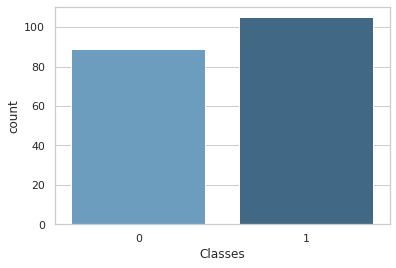

0.819672131147541


Text(0.5, 257.44, 'Predicted')

<Figure size 432x288 with 0 Axes>

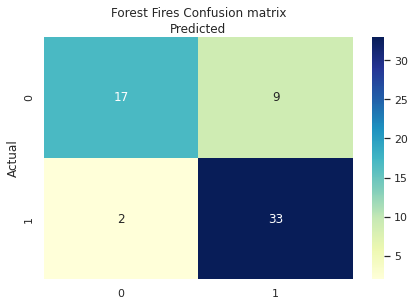

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

from google.colab import files

uploaded = files.upload()

df = pd.read_csv(io.StringIO(uploaded['Algerian_forest_fires_dataset_UPDATE (1).csv'].decode('utf-8')))
#df = df[['day','month','year','Temperature','RH','Ws', 'Rain','FFMC','DMC','DC','ISI','BUI', 'FWI', 'Classes']]
df.columns = df.columns.str.strip()
df['Classes'] = df['Classes'].str.rstrip()
df['Classes'] = df['Classes'].replace(['not fire'],0)
df['Classes'] = df['Classes'].replace(['fire'],1)
#marks_list = df['Classes'].tolist()
#print(marks_list)

#print(df.columns.tolist())
df.head(244)

from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.2)

train_df = trainingSet
test_df = testSet
X = pd.DataFrame(df, columns = ['day','month','year','Temperature','RH','Ws', 'Rain'])
#X = pd.DataFrame(df, columns = ['day','month','year','Temperature','RH','Ws', 'Rain','FFMC','DMC','DC','ISI','BUI', 'FWI'])
y = pd.DataFrame(df, columns = [ 'Classes'])

#FFMC skews vals - do not use in data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=22)
#X_train = train_df[['day','month','year','Temperature','RH','Ws', 'Rain','FFMC','DMC','DC','ISI','BUI','FWI']]

#X_test = test_df[['day','month','year','Temperature','RH','Ws', 'Rain','FFMC','DMC','DC','ISI','BUI','FWI']]

#y_train = train_df["Classes"]

#y_test = test_df["Classes"]

y_train.value_counts()
sns.countplot("Classes", data=train_df, palette='Blues_d')
plt.show()
plt.savefig('count_plot')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train,y_train.values.ravel())
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
#predicts forest fires with 97% accuracy


from sklearn import metrics

# Create the Confusion Matrix
# y_test = dataframe['diagnosis']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

#confusion matrix
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Forest Fires Confusion matrix', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
#with decision trees

from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)

classifier = DecisionTreeClassifier(max_depth=5)
classifier = classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)


0.8524590163934426

In [ ]:
#with KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 20)

knn.fit(X_train, y_train)

knn.score(X_test, y_test)



#ordered = decision trees, logistic regression, KNN

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8032786885245902